# Can we identify the need for panel cleaning/maintenance?

## Prepare

In [100]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data set (we use plant 2 here)

plant2_g = pd.read_csv('./data/Plant_2_Generation_Data.csv')
plant2_s = pd.read_csv('./data/Plant_2_Weather_Sensor_Data.csv')

# Find the size of data
print(plant2_g.shape)
print(plant2_s.shape)

(67698, 7)
(3259, 6)


In [101]:
# Details about the generation data
print(plant2_g.sample(5))
print("We have",len(plant2_g.SOURCE_KEY .unique()),"inverters for plant 2 generation data.")

                 DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER     AC_POWER  \
51220  2020-06-10 04:45:00   4136001  4UPUqMRk7TRMgml       0.0     0.000000   
27966  2020-05-30 04:00:00   4136001  4UPUqMRk7TRMgml       0.0     0.000000   
63304  2020-06-15 22:00:00   4136001  LlT2YUhhzqhg5Sw       0.0     0.000000   
61406  2020-06-15 00:30:00   4136001  4UPUqMRk7TRMgml       0.0     0.000000   
21329  2020-05-26 10:00:00   4136001  oZZkBaNadn6DNKz    1089.5  1064.793333   

       DAILY_YIELD   TOTAL_YIELD  
51220  8098.000000  2.618699e+06  
27966     0.000000  2.537682e+06  
63304  6151.000000  2.827795e+08  
61406  1868.000000  2.641320e+06  
21329  2099.933333  1.708159e+09  
We have 22 inverters for plant 2 generation data.


In [102]:
# Details about the  weather sensor data
plant2_s.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
254,2020-05-17 15:45:00,4136001,iq8k7ZNt4Mwm3w0,35.512026,41.278480,0.278562
1176,2020-05-27 06:30:00,4136001,iq8k7ZNt4Mwm3w0,25.858954,25.846911,0.056535
923,2020-05-24 15:15:00,4136001,iq8k7ZNt4Mwm3w0,37.855879,53.019688,0.590665
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.000000
1028,2020-05-25 17:30:00,4136001,iq8k7ZNt4Mwm3w0,36.003799,35.963227,0.029605


In [103]:
# Join table
data = pd.merge(plant2_s, plant2_g, on='DATE_TIME', how='outer', suffixes=('_s', '_g'))
data[['DATE', 'TIME']] = data['DATE_TIME'].str.split(' ', expand=True)
print(data.sample(5))


                 DATE_TIME  PLANT_ID_s     SOURCE_KEY_s  AMBIENT_TEMPERATURE  \
25271  2020-05-28 16:45:00     4136001  iq8k7ZNt4Mwm3w0            36.079632   
23601  2020-05-27 17:30:00     4136001  iq8k7ZNt4Mwm3w0            35.660515   
50291  2020-06-09 18:00:00     4136001  iq8k7ZNt4Mwm3w0            30.975934   
43837  2020-06-06 16:45:00     4136001  iq8k7ZNt4Mwm3w0            33.657895   
32226  2020-06-01 04:15:00     4136001  iq8k7ZNt4Mwm3w0            23.720711   

       MODULE_TEMPERATURE  IRRADIATION  PLANT_ID_g     SOURCE_KEY_g  \
25271           41.750671     0.246055     4136001  oZZkBaNadn6DNKz   
23601           37.960130     0.131243     4136001  xoJJ8DcxJEcupym   
50291           31.487287     0.053980     4136001  q49J1IKaHRwDQnt   
43837           40.121037     0.330487     4136001  PeE6FRyGXUgsRhN   
32226           22.873644     0.000000     4136001  mqwcsP2rE7J0TFp   

         DC_POWER    AC_POWER  DAILY_YIELD   TOTAL_YIELD        DATE      TIME  
25271  377.

## Testing

/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_53688/950433957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_18_data['TIME'] = pd.to_datetime(may_18_data['TIME'], format='%H:%M:%S')
/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_53688/950433957.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_18_data['DAILY_YIELD_DIFF'] = may_18_data['DAILY_YIELD'].diff()


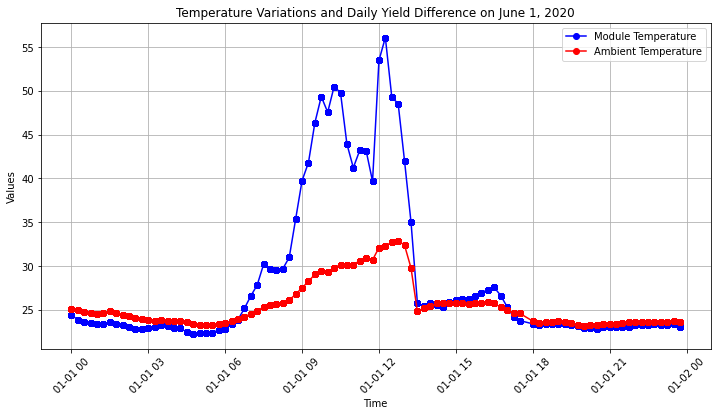

In [105]:
# Correcting the conversion of TIME to datetime format
may_18_data = data[data['DATE'] == '2020-05-18']

# Converting TIME to datetime format
may_18_data['TIME'] = pd.to_datetime(may_18_data['TIME'], format='%H:%M:%S')

# Calculating the difference in DAILY_YIELD
may_18_data['DAILY_YIELD_DIFF'] = may_18_data['DAILY_YIELD'].diff()

plt.figure(figsize=(12, 6))
plt.plot(may_18_data['TIME'], may_18_data['MODULE_TEMPERATURE'], marker='o', linestyle='-', color='b', label='Module Temperature')
plt.plot(may_18_data['TIME'], may_18_data['AMBIENT_TEMPERATURE'], marker='o', linestyle='-', color='r', label='Ambient Temperature')
#plt.plot(may_18_data['TIME'], may_18_data['DAILY_YIELD_DIFF'], marker='o', linestyle='-', color='g', label='Daily Yield Difference')
plt.title('Temperature Variations and Daily Yield Difference on June 1, 2020')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


